# PS1

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.lines as mlines

# 1

In [14]:
img1 = cv2.imread(r'C:\Users\sus85\OneDrive\Desktop\CV\cv_David\CV_training\computer_vision\course_resources\ps_1\ps1-input0.png')

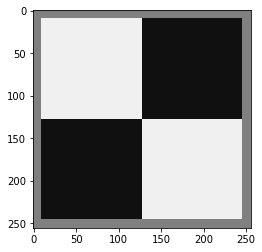

In [15]:
plt.imshow(img1)

# generate an edge image 

In [16]:
img_blur = cv2.GaussianBlur(img1, (5,5), sigmaX=1, sigmaY=1) 

In [17]:
img_edges = cv2.Canny(image=img1, threshold1=100, threshold2=200)

In [18]:
img_edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
cv2.imshow('Canny Edge Detection', img_edges)
cv2.waitKey(0) # shown in a window

-1

# 2 (Hough Transform)

In [330]:
import math
from tqdm import tqdm


def hough_lines_acc(img, rhos=None, thetas=None, lines_are_white=True, value_threshold=0):
    # Rho and Theta ranges
    if type(thetas) != np.ndarray:
        thetas = np.deg2rad(np.arange(0, 180, 1))
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    if rhos==None:
        rhos = np.linspace(-diag_len, diag_len, diag_len * 2)  
        
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)
    print(num_thetas)

    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint8)
    # (row, col) indexes to edges
    are_edges = img > value_threshold if lines_are_white else img < value_threshold
    y_idxs, x_idxs = np.nonzero(are_edges)
    # Vote in the hough accumulator
    for i in tqdm(range(len(x_idxs))):
        x = x_idxs[i]
        y = y_idxs[i]
        
        rho_s = diag_len + np.around(x * cos_t + y * sin_t).astype(int)
    
        accumulator[rho_s, np.arange(num_thetas)] += 1

    return accumulator, thetas, rhos

In [331]:
acc, theta, rho = hough_lines_acc(img_edges)

180


100%|██████████| 1406/1406 [00:00<00:00, 26651.08it/s]


In [305]:
acc, theta, rho = hough_lines_acc(img_edges, thetas=np.deg2rad(np.arange(0, 180, 2)))

90


100%|██████████| 1406/1406 [00:00<00:00, 35047.46it/s]


In [332]:
cv2.imshow('Hough transform', acc)
cv2.waitKey(0) # shown in a window

-1

# b

In [314]:
def hough_peaks(H, numpeaks):
    return np.dstack(np.unravel_index(np.argsort(H.ravel())[-numpeaks:], H.shape)).squeeze(0)


def local_max(H, numpeaks):
    local_maxs = []
    for i in np.arange(H.shape[0], step=3):
        for j in np.arange(H.shape[1], step=3):
            max_idx = np.argmax(H[i:i+3, j:j+3])
            local_maxs.append([i + int(max_idx/3), j + max_idx%3, np.max(H[i:i+3, j:j+3])]) 
    
    local_maxs = sorted(local_maxs, key=lambda x: x[2], reverse=True)[:numpeaks]
    return np.array(local_maxs)[:,:2]        
# peaks = hough_peaks(acc, 6)    

In [337]:
maxs = local_max(acc, 6)
print(maxs)

[[607   0]
 [607  90]
 [489   0]
 [489  90]
 [370   0]
 [370  90]]


In [335]:
peaks = hough_peaks(acc, 6)    

In [321]:
peaks

array([[483,  46],
       [486,  46],
       [487,  46],
       [496,   1],
       [370,  45],
       [370,   0],
       [489,  45],
       [489,   0],
       [607,  45],
       [607,   0]], dtype=int64)

# c

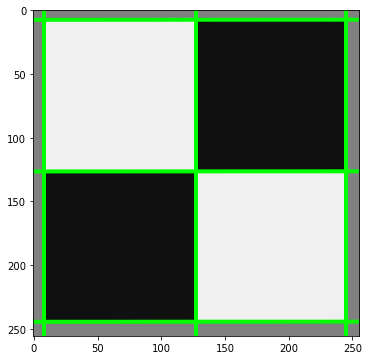

In [338]:
edge_height, edge_width = img_edges.shape[:2]
edge_height_half, edge_width_half = edge_height / 2, edge_width / 2
diag_len = int(round(math.sqrt(img1.shape[0] * img1.shape[0] + img1.shape[1] * img1.shape[1])))

def pol2cart(line, diag_len):
    rho, theta = line[0], line[1]
    a = np.cos(np.deg2rad(theta))
    b = np.sin(np.deg2rad(theta))
    x0 = (a * (rho - diag_len)) 
    y0 = (b * (rho - diag_len))
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    subplot.add_line(mlines.Line2D([x1, x2], [y1, y2],linewidth=4,color='lime'))


figure = plt.figure(figsize=(6, 6))
subplot = figure.add_subplot(1, 1, 1)
subplot.imshow(img1)
np.apply_along_axis(pol2cart, 1, maxs, diag_len)
plt.show()

# 3

In [3]:
img1_noise = cv2.imread(r'C:\Users\sus85\OneDrive\Desktop\CV\cv_David\CV_training\computer_vision\course_resources\ps_1\ps1-input0-noise.png')

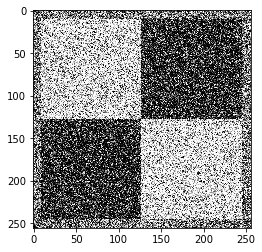

In [4]:
plt.imshow(img1_noise)
plt.show()

# a

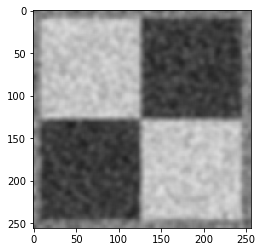

In [5]:
img1_noise_blur = cv2.GaussianBlur(img1_noise, ksize=(11,11), sigmaX=2.8)
plt.imshow(img1_noise_blur)

# b

In [6]:
edges_noise = cv2.Canny(image=img1_noise_blur, threshold1=0, threshold2=95)

In [7]:
cv2.imshow('Canny Edge Detection', edges_noise)
cv2.waitKey(0) # shown in a window

-1

# c

In [339]:
acc_noise, theta, rho = hough_lines_acc(edges_noise)

180


100%|██████████| 1747/1747 [00:00<00:00, 27335.31it/s]


In [347]:
peaks_noise = local_max(acc_noise, 8)
print(peaks_noise)

[[489  90]
 [488   0]
 [607   0]
 [489   0]
 [370   0]
 [369  91]
 [487  91]
 [608  90]]


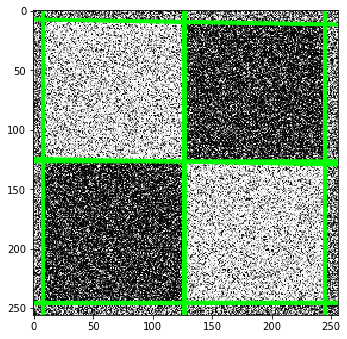

In [348]:
figure = plt.figure(figsize=(12, 12))
subplot = figure.add_subplot(1, 2, 2)
subplot.imshow(img1_noise)
np.apply_along_axis(pol2cart, 1, peaks_noise, diag_len)
plt.show()

# 4

In [349]:
img2 = cv2.imread(r'C:\Users\sus85\OneDrive\Desktop\CV\cv_David\CV_training\computer_vision\course_resources\ps_1\ps1-input1.png')
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

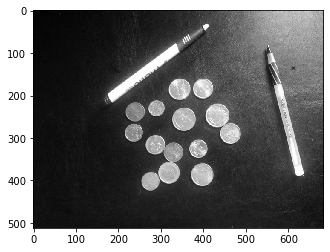

In [350]:
plt.imshow(img2_gray, cmap='gray')

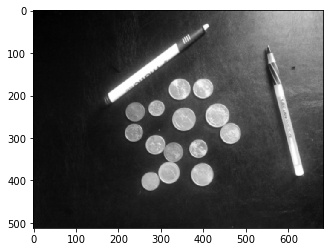

In [351]:
img2_noise_blur = cv2.GaussianBlur(img2_gray, ksize=(5,5), sigmaX=1,sigmaY=1)
plt.imshow(img2_noise_blur, cmap='gray')

# b

In [352]:
edges_noise_2 = cv2.Canny(image=img2_noise_blur, threshold1=100, threshold2=200)
cv2.imshow('Canny Edge Detection', edges_noise_2)
cv2.waitKey(0) # shown in a window

-1

# c

In [354]:
acc_noise_2, theta, rho = hough_lines_acc(edges_noise_2)
peaks_noise_2 = local_max(acc_noise_2, 10) 

180


100%|██████████| 4791/4791 [00:00<00:00, 28440.08it/s]


In [355]:
diag_len_noise = int(round(math.sqrt(img2.shape[0] * img2.shape[0] + img2.shape[1] * img2.shape[1])))
print(diag_len_noise)

854


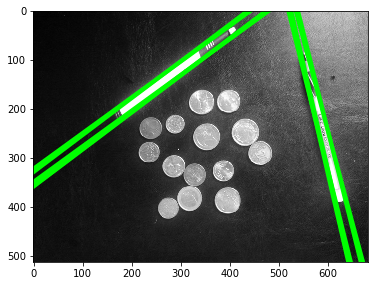

In [356]:
figure = plt.figure(figsize=(6, 6))
subplot = figure.add_subplot(1, 1, 1)
subplot.imshow(img2_gray, cmap='gray')
np.apply_along_axis(pol2cart, 1, peaks_noise_2, diag_len_noise)
plt.show()

# 5

In [109]:
from collections import defaultdict
from tqdm import tqdm
def hough_circles_acc(edge_image, radius, num_thetas):
    
    if type(radius) == list:
        rs = np.arange(radius[0], radius[1], step=1)
    else:
        rs = [radius]
        
    img_height, img_width = edge_image.shape[:2]
    dtheta = int(360 / num_thetas)
    thetas = np.arange(0, 360, step=dtheta)
    cos_thetas = np.cos(np.deg2rad(thetas))
    sin_thetas = np.sin(np.deg2rad(thetas))
    circle_candidates = []
    
    are_edges = edge_image > 0
    y_idxs, x_idxs = np.nonzero(are_edges)
    
    for r in rs:
        for t in range(num_thetas):
            circle_candidates.append((r, int(r * cos_thetas[t]), int(r * sin_thetas[t])))
            
    # accumulator_xy = np.zeros((img_width + rs[0], img_height + rs[0]), dtype=np.uint8)
    accumulator = defaultdict(int)
    
    for i in tqdm(range((len(x_idxs)))):
        x = x_idxs[i]
        y = y_idxs[i]
        for r, rcos_t, rsin_t in circle_candidates:
            x_center = x - rcos_t
            y_center = y - rsin_t
            accumulator[(x_center, y_center, r)] += 1 #vote for current candidate
            # if i > 3515:
            #     print(x_center, y_center)
            # accumulator_xy[x_center, y_center] += 1
                    
    return accumulator

In [110]:
acc_circles = hough_circles_acc(edges_noise_2, [20,40], 360)

100%|██████████| 4791/4791 [00:38<00:00, 123.89it/s]


In [111]:
peaks_noise_circle = hough_peaks(np.array(list(acc_circles.values())), 30) 

In [112]:
peaks_circle = np.array(list(acc_circles.keys()))[peaks_noise_circle]

In [113]:
peaks_circle = peaks_circle.squeeze(1)

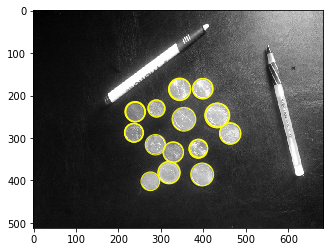

In [114]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
ax.imshow(img2_gray, cmap='gray')
for circle in peaks_circle:
    circle_draw = plt.Circle((circle[0], circle[1]), circle[2], color='yellow', fill=False)
    ax.add_patch(circle_draw)

plt.show()



# b

In [115]:
acc_circles_b = hough_circles_acc(edges_noise_2, [10,50], 360)

100%|██████████| 4791/4791 [01:18<00:00, 61.06it/s]


In [116]:
peaks_noise_circle_b = hough_peaks(np.array(list(acc_circles_b.values())), 40) 

In [117]:
peaks_circle_b = np.array(list(acc_circles_b.keys()))[peaks_noise_circle_b]
peaks_circle_b = peaks_circle_b.squeeze(1)

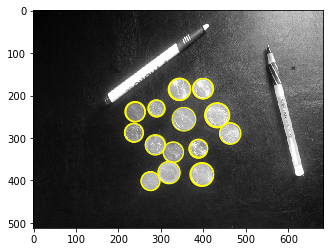

In [118]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
ax.imshow(img2_gray, cmap='gray')
for circle in peaks_circle_b:
    circle_draw = plt.Circle((circle[0], circle[1]), circle[2], color='yellow', fill=False)
    ax.add_patch(circle_draw)

plt.show()


# 6

In [30]:
img3 = cv2.imread(r'C:\Users\sus85\OneDrive\Desktop\CV\cv_David\CV_training\computer_vision\course_resources\ps_1\ps1-input2.png')
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

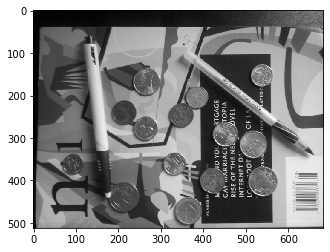

In [31]:
plt.imshow(img3_gray, cmap='gray')
plt.show()

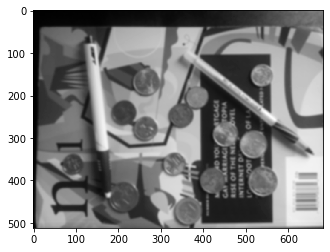

In [32]:
img3_noise_blur = cv2.GaussianBlur(img3_gray, ksize=(9,9), sigmaX=2,sigmaY=2)
plt.imshow(img3_noise_blur, cmap='gray')

In [33]:
edges_noise_3 = cv2.Canny(image=img3_noise_blur, threshold1=0, threshold2=100)
cv2.imshow('Canny Edge Detection', edges_noise_3)
cv2.waitKey(0) # shown in a window

-1

In [123]:
acc_noise_3, theta, rho = hough_lines_acc(edges_noise_3)
peaks_noise_3 = hough_peaks(acc_noise_3, 40) 

100%|██████████| 19129/19129 [00:35<00:00, 534.92it/s]


In [124]:
diag_len_3 = int(round(math.sqrt(img3.shape[0] * img3.shape[0] + img3.shape[1] * img3.shape[1])))
print(diag_len_3)

854


In [125]:
slopes = []
def pol2cart_lines(line, diag_len):
    rho, theta = line[0], line[1]
    a = np.cos(np.deg2rad(theta))
    b = np.sin(np.deg2rad(theta))
    x0 = (a * (rho - diag_len)) 
    y0 = (b * (rho - diag_len))
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    slopes.append(([x1, x2], [y1, y2], (y2-y1) / (x2-x1 + 0.0001)))
    # subplot.add_line(mlines.Line2D([x1, x2], [y1, y2],linewidth=4,color='lime'))

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None], dtype=object)

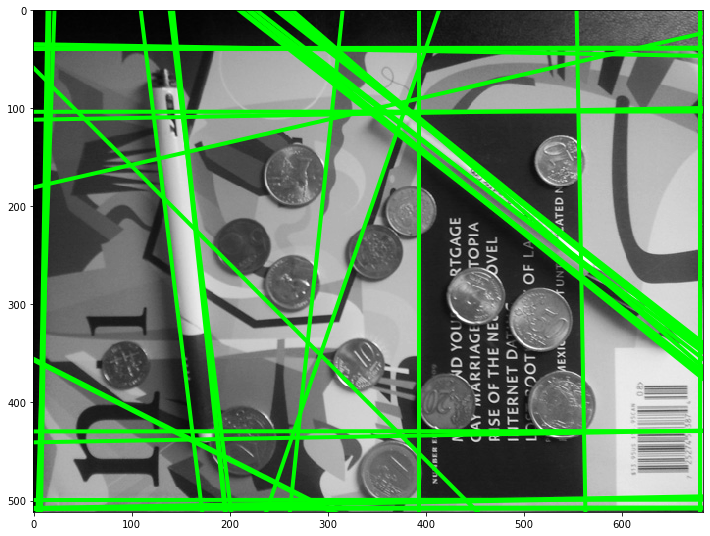

In [126]:
figure = plt.figure(figsize=(12, 12))
subplot = figure.add_subplot(1, 1, 1)
subplot.imshow(img3_gray, cmap='gray')
np.apply_along_axis(pol2cart, 1, peaks_noise_3, diag_len_3)

In [127]:
np.apply_along_axis(pol2cart_lines, 1, peaks_noise_3, diag_len_3)

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None], dtype=object)

In [128]:
def check_parallel_lines(lines):
    parallel_lines = []
    for i in range(len(lines)):
        for j in range(len(lines)):
            if i != j:
                if  0.99 < (lines[i][2] / lines[j][2]) < 1.01:
                    if np.linalg.norm(np.array(lines[i][0]) - np.array(lines[j][0])) > 10:
                        
                        parallel_lines.append((lines[i], np.linalg.norm(np.array(lines[i][0]) - np.array(lines[j][0]))))
                        # parallel_lines.append((lines[j], np.linalg.norm(np.array(lines[i][0]) - np.array(lines[j][1]))))
                    break    
                        
                        
                        
    return parallel_lines

p_lines = check_parallel_lines(slopes)

In [129]:
p_lines = sorted(p_lines, key=lambda line: line[1])

[-693, 882] [-736, 495]
[-689, 864] [-737, 521]
[-690, 863] [-736, 522]
[15, 258] [-1009, 975]
[-14, 229] [-1005, 979]




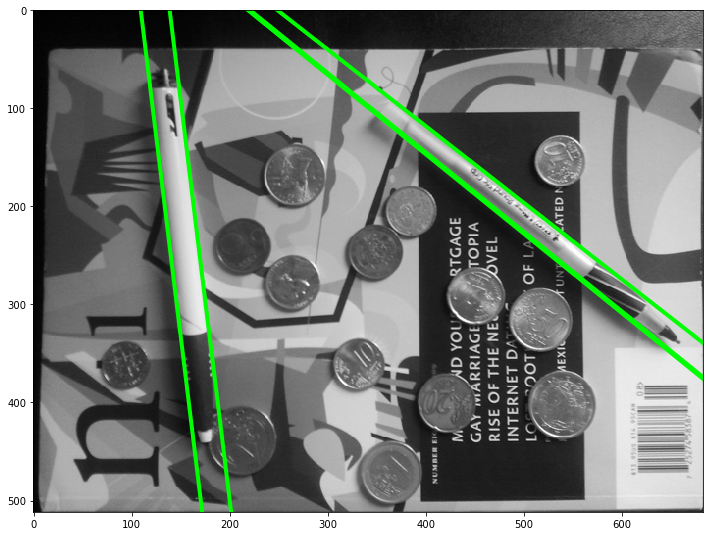

In [130]:
figure = plt.figure(figsize=(12, 12))
subplot = figure.add_subplot(1, 1, 1)
subplot.imshow(img3_gray, cmap='gray')
for line in p_lines[:5]:
    x1, x2 = line[0][0][0], line[0][0][1]
    y1, y2 = line[0][1][0], line[0][1][1]
    print([x1, x2], [y1, y2])
    subplot.add_line(mlines.Line2D([x1, x2], [y1, y2],linewidth=4,color='lime'))
print('\n')
# np.apply_along_axis(pol2cart, 1, peaks_noise_3, diag_len_3)
plt.show()

# 7

In [131]:
acc_circles_2 = hough_circles_acc(edges_noise_3, [20,50], 360)

100%|██████████| 19129/19129 [05:53<00:00, 54.04it/s]


In [132]:
peaks_noise_circle_2= hough_peaks(np.array(list(acc_circles_2.values())), 60) 

In [133]:
peaks_circle_2 = np.array(list(acc_circles_2.keys()))[peaks_noise_circle_2]
peaks_circle_2 = peaks_circle_2.squeeze(1)

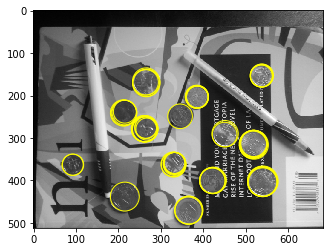

In [134]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
ax.imshow(img3_gray, cmap='gray')
for circle in peaks_circle_2:
    circle_draw = plt.Circle((circle[0], circle[1]), circle[2], color='yellow', fill=False)
    ax.add_patch(circle_draw)

plt.show()


# 8

In [135]:
img4 = cv2.imread(r'C:\Users\sus85\OneDrive\Desktop\CV\cv_David\CV_training\computer_vision\course_resources\ps_1\ps1-input3.png')
img4_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

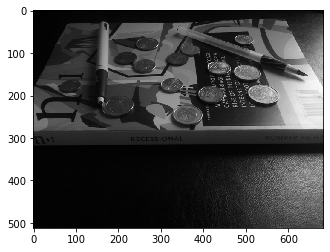

In [136]:
plt.imshow(img4_gray, cmap='gray')

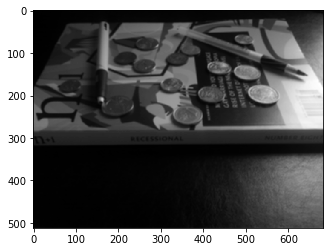

In [137]:
img4_noise_blur = cv2.GaussianBlur(img4_gray, ksize=(5,5), sigmaX=2,sigmaY=2)
plt.imshow(img4_noise_blur, cmap='gray')

In [143]:
edges_noise_4 = cv2.Canny(image=img4_noise_blur, threshold1=50, threshold2=140)
cv2.imshow('Canny Edge Detection', edges_noise_4)
cv2.waitKey(0) # shown in a window

-1

In [144]:
acc_circles_3 = hough_circles_acc(edges_noise_4, [20,50], 360)

100%|██████████| 9960/9960 [02:56<00:00, 56.50it/s]


In [146]:
peaks_noise_circle_3 = hough_peaks(np.array(list(acc_circles_3.values())), 40) 
peaks_circle_3 = np.array(list(acc_circles_3.keys()))[peaks_noise_circle_3]
peaks_circle_3 = peaks_circle_3.squeeze(1)

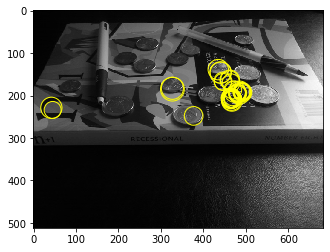

In [147]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
ax.imshow(img4_gray, cmap='gray')
for circle in peaks_circle_3:
    circle_draw = plt.Circle((circle[0], circle[1]), circle[2], color='yellow', fill=False)
    ax.add_patch(circle_draw)

plt.show()

In [148]:
acc_noise_4, theta, rho = hough_lines_acc(edges_noise_4)
peaks_noise_4 = hough_peaks(acc_noise_4, 40) 

100%|██████████| 9960/9960 [00:19<00:00, 516.41it/s]


In [149]:
diag_len_4 = int(round(math.sqrt(img4.shape[0] * img4.shape[0] + img4.shape[1] * img4.shape[1])))
print(diag_len_4)

854


array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None], dtype=object)

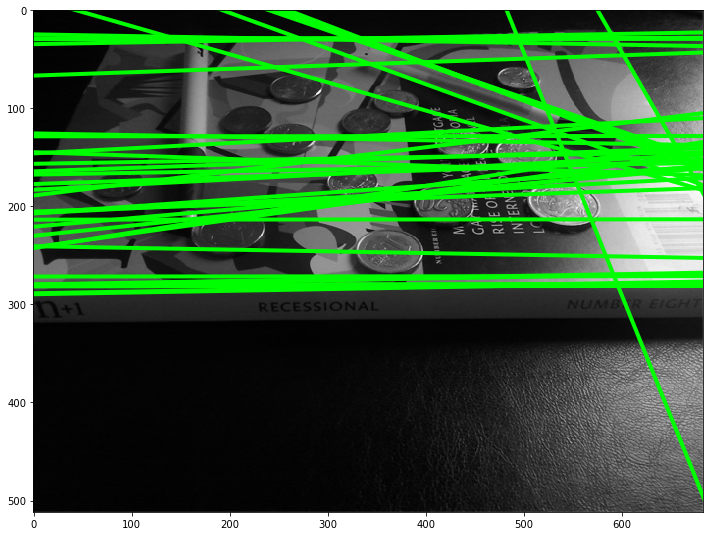

In [150]:
figure = plt.figure(figsize=(12, 12))
subplot = figure.add_subplot(1, 1, 1)
subplot.imshow(img4_gray, cmap='gray')
np.apply_along_axis(pol2cart, 1, peaks_noise_4, diag_len_4)

# GHF

In [151]:
from collections import defaultdict
from tqdm import tqdm
def hough_ellipse_acc(edge_image, a_s, b_s, num_thetas):
    
    img_height, img_width = edge_image.shape[:2]
    dtheta = int(360 / num_thetas)
    thetas = np.arange(0, 360, step=dtheta)
    cos_thetas = np.cos(np.deg2rad(thetas))
    sin_thetas = np.sin(np.deg2rad(thetas))
    ellipse_candidates = []
    
    are_edges = edge_image > 0
    y_idxs, x_idxs = np.nonzero(are_edges)
    for a in a_s:
        for b in b_s:
            for t in range(num_thetas):
                ellipse_candidates.append((a, b, int(a * cos_thetas[t]), int(b * sin_thetas[t])))

    accumulator = defaultdict(int)
    
    for i in tqdm(range((len(x_idxs)))):
        x = x_idxs[i]
        y = y_idxs[i]
        for a, b, acos_t, bsin_t in ellipse_candidates:
            x_center = x - acos_t
            y_center = y - bsin_t
            accumulator[(x_center, y_center, a, b)] += 1
                    
    return accumulator

In [152]:
acc_ellipse = hough_ellipse_acc(edges_noise_4, a_s=[50,70,90, 100], b_s=[40, 60, 80, 100], num_thetas=360)
# peaks_ellipse = peaks_ellipse.squeeze(1)

100%|██████████| 9960/9960 [01:54<00:00, 86.91it/s] 


In [153]:
peaks_ellipse = hough_peaks(np.array(list(acc_ellipse.values())), 70) 
peaks_ellipse = np.array(list(acc_ellipse.keys()))[peaks_ellipse]
peaks_ellipse = peaks_ellipse.squeeze(1)

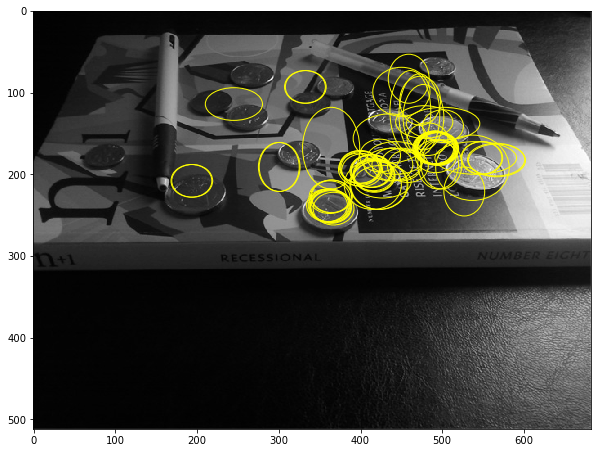

In [154]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
fig, ax = plt.subplots(figsize=(10,10)) # note we must use plt.subplots, not plt.subplot

ax.imshow(img4_gray, cmap='gray')
for ellipse in peaks_ellipse:
    ellipse_draw = Ellipse((ellipse[0], ellipse[1]), ellipse[2], ellipse[3], color='yellow', fill=False)
    ax.add_patch(ellipse_draw)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
ax.imshow(img4_gray, cmap='gray')
# for circle in peaks_ellipse:
#     circle_draw = plt.Circle((circle[0], circle[1]), circle[2], color='yellow', fill=False)
#     ax.add_patch(circle_draw)

plt.show()